# Naive representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

import qiskit
from qiskit import *

In [2]:
# float to binary 
def float_to_bin_real(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')
def float_to_bin_imag(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')

# binary to float
def bin_to_float_real(binary):
    return struct.unpack('!f',struct.pack('!I', int(binary, 2)))[0]
def bin_to_float_imag(binary):
    return struct.unpack('!f',struct.pack('!I', int(binary, 2)))[0]

# reverse a string (for the measurement step readout)
def reverse(string):
    string = string[::-1]
    return string

In [3]:
# image of the sky filled with double precision complex floats (single precision for reals/imaginaries)
# few pixels are set to relatively large complex random values in random spots (image sources)
# relatively small complex values are added (white noise from background radiations) 

n = 10 #number of antennas

sky_image = np.zeros((n, n), dtype='complex64')
mask = np.zeros((n, n), dtype='bool')
stars = np.random.randint(1, 11) #random number of sources
radius = 1 #np.random.randint(1, 3) #with random radius

for i in range(0, stars):
    index_i = np.random.randint(0, sky_image.shape[0]-radius)
    index_j = np.random.randint(0, sky_image.shape[1]-radius)
    for j in range(0, radius):
        for k in range(0, radius):
            sky_image[index_i+j][index_j+k] = complex(np.random.rand()*100, np.random.rand()*100)
            mask[index_i+j][index_j+k] = True
            
sky_image.real += np.random.randn(n,n)/100
sky_image.imag += np.random.randn(n,n)/100

print(sky_image)

[[-3.18169594e-03-1.19474754e-02j  1.09435162e-02+1.60256727e-03j
  -5.45061892e-03-1.26525965e-02j  2.45730858e-03+1.63127836e-02j
  -1.28980232e-02+2.03223535e-04j  3.42020392e-03-1.59825608e-02j
   3.32846958e-03+1.28770259e-03j -6.43779337e-03-6.15656283e-03j
   2.62335408e-03+1.69234145e-02j  2.35921051e-03+3.39170801e-03j]
 [ 3.64806363e-03-2.45511881e-03j  8.08300078e-03-4.00494179e-03j
  -3.27044018e-02+2.12964555e-03j  1.77258682e-02+5.02958009e-03j
  -6.30282098e-03-4.13167430e-03j  1.11780101e-02+6.64098375e-03j
   1.62357907e-03-1.95498541e-02j -5.29548805e-03-9.56331939e-03j
   5.15987165e-04-5.87528711e-03j  1.04164323e-02-4.60362015e-03j]
 [-1.07528269e-03-2.79984716e-02j -1.75878014e-02+8.29511788e-03j
  -5.24870679e-03-1.52787063e-02j  7.65036279e-03-4.45918785e-03j
   1.06047979e-02+1.12391366e-02j  6.34754822e-03-1.63190868e-02j
  -7.62624666e-03+1.52122471e-02j -5.68759278e-04+3.86673934e-03j
   8.25465366e-04-4.46110824e-03j  1.49513141e-03-1.12384213e-02j]
 [ 7.46

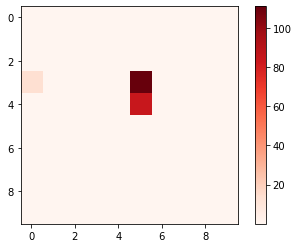

In [4]:
modulus = np.absolute(sky_image)
plt.imshow(modulus, cmap='Reds') 
cbar = plt.colorbar()

In [5]:
visibilities = np.fft.fft2(sky_image).astype('complex64')
print(visibilities)

[[ 165.70546  +1.03123108e+02j -150.86089  -8.06634521e+01j
   165.7076   +1.03169441e+02j -150.77031  -8.07686081e+01j
   165.80954  +1.03135445e+02j -150.98402  -8.06935730e+01j
   165.7554   +1.03201653e+02j -150.77716  -8.07012711e+01j
   165.98245  +1.03301216e+02j -150.90828  -8.08513870e+01j]
 [   1.5360181-1.63934921e+02j   15.335668 +1.42824783e+02j
     1.76193  -1.63914520e+02j   15.299611 +1.42831665e+02j
     1.5162002-1.63965851e+02j   15.276565 +1.42744247e+02j
     1.4887967-1.63891357e+02j   15.348066 +1.42832367e+02j
     1.5599085-1.63988312e+02j   15.321934 +1.42762024e+02j]
 [-104.78258  +5.51518898e+01j   79.241394 -6.46501694e+01j
  -104.68988  +5.51013870e+01j   79.198456 -6.47743454e+01j
  -104.63423  +5.51392097e+01j   79.11505  -6.46612091e+01j
  -104.537056 +5.51742668e+01j   79.26607  -6.48046112e+01j
  -104.61995  +5.51411057e+01j   79.23446  -6.45788193e+01j]
 [  46.395878 +4.70411606e+01j  -47.65997  -2.01045284e+01j
    46.43515  +4.70592194e+01j  -47.6

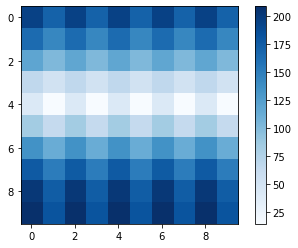

In [6]:
modulus = np.absolute(visibilities)
plt.imshow(modulus, cmap='Blues')
plt.colorbar();

In [7]:
sanity = np.fft.ifft2(visibilities).astype('complex64')

test1_real = ((sky_image.real - sanity.real)**2).mean()
test1_imag = ((sky_image.imag - sanity.imag)**2).mean()
 
print('Reals MSE: '+ str(test1_real))
print('Imaginaries MSE: '+ str(test1_imag))

Reals MSE: 5.428828e-14
Imaginaries MSE: 6.739504e-14


In [8]:
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [9]:
# encoding binary data onto qubits
def binary_encode(qc, binary, off_set):
    
    for i in range(0, len(binary)):
        qc.reset(off_set+i) # set quantum state |0> by default for all qubits

        if binary[i]=='1':
            qc.x(off_set+i) # act as a CX (controlled X gate)
    
    off_set += len(binary)

    return off_set

In [10]:
number_of_entries = visibilities.shape[0] * visibilities.shape[1]
number_of_bits_real = 32
number_of_bits_imag = 32
number_of_bits = number_of_bits_real + number_of_bits_imag
off_set = 0

# encoding (n bits encoded onto n qubits)
qc = QuantumCircuit(number_of_entries*number_of_bits)
for i in range(0, visibilities.shape[0]):
    for j in range(0, visibilities.shape[1]):
            binary_real = float_to_bin_real(visibilities[i, j].real)
            binary_imag = float_to_bin_imag(visibilities[i, j].imag)
            binary = binary_real+binary_imag
            off_set = binary_encode(qc, binary, off_set)

In [11]:
#RUNNING THIS CELL OUTPUTS MEMORY ISSUE

sim = Aer.get_backend("aer_simulator_matrix_product_state")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

Simulation failed and returned the following error message:
ERROR: a circuit requires more memory than max_memory_mb.


QiskitError: 'ERROR: a circuit requires more memory than max_memory_mb. ,  EMPTY'

In [ ]:
# measurement
#qc.measure_all()
#backend = Aer.get_backend('aer_simulator') # Qiskit's staple simulator (CHOICE MOTIVATION?)
#job = backend.run(qc, shots=1, memory=True) 
#output = job.result().get_memory()[0]
#out = reverse(output)

# readout
chunks_real = []
chunks_imag = []
for i in range(0, number_of_entries):
    chunks_real.append(out[number_of_bits*i:(number_of_bits*i)+number_of_bits_real]) # real parts represented every 64 bits starting from the first one
    chunks_imag.append(out[(number_of_bits*i)+number_of_bits_imag:(number_of_bits*i)+number_of_bits_imag+number_of_bits_imag]) # imaginary parts represented every 64 bits starting after the first occurence of a real part 

readout = []
for i in range(0, len(chunks_real)):
    readout.append(complex(bin_to_float_real(chunks_real[i]), bin_to_float_imag(chunks_imag[i]))) 

readout = np.array(readout).reshape(n , n).astype('complex64')
print(readout)

In [ ]:
fidelity = np.fft.ifft2(readout).astype('complex64')

In [ ]:
test2_real = ((sky_image.real - fidelity.real)**2).mean()
test2_imag = ((sky_image.imag - fidelity.imag)**2).mean()

print('Reals MSE: '+ str(test2_real))
print('Imaginaries MSE: '+ str(test2_imag))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
modulus1 = np.absolute(sky_image)
modulus2 = np.absolute(fidelity)

axs[0].imshow(modulus1, cmap='Reds')
axs[1].imshow(modulus2, cmap='Reds')

axs[0].set_title("Original image")
axs[1].set_title("Reconstructed image")

for ax in axs.flat:
    ax.set(xlabel=n, ylabel=n)